In [5]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install plotly

! pip install statsmodels
! pip install sklearn


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 132.7 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [6]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')

In [15]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
# 1.2 Take a sample
df_raw.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:

# 1.2 Take a simple description for numerical values
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Hints, Meaning of each attribute:
'''
Age (numerical)
Job: Type of Job (categorical)
Marital: marital status (categorical)
Education: (categorical)
Default: has credit in default? (categorical)
Housing: has housing loan? (categorical)
Loan: has personal loan? (categorical)
contact: contact communication type (categorcial)
month: last contact month of year (categorical)
day_of_week: last contact day of the week (categorical)
duration: last contact duration, in seconds (numerical)
    Important note: this output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.
campaign: number of contacts performed during this campaign and for this client (numerical)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numerical)
poutcome: outcome of the previous marketing campaign (categorical)
    Important note: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.
emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index- monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
euribor3m: euribor 3 month rate: - daily indicator(numeric)
nr.employed: number of employees - quarterly indicator (numeric)

Target variable:
y: has the client subscribed a term deposit?
'''

In [19]:
# Drop NAs & duplicates
df_raw = df_raw.dropna().drop_duplicates()
#df = df.reset_index(inplace = False)[['url','is_spam']]

In [20]:
# Step 2. Make a basic EDA

df_raw.shape
print(f'The Dataset has {df_raw.shape[0]} "observations" with {df_raw.shape[0]} columns')

df_len = len(df_raw)

The Dataset has 41176 "observations" with 41176 columns


In [31]:
# Replace unknown with mode:
condition  = (df_raw['job'] == 'unknown')
df_raw.loc[condition, 'job'] = df_raw['job'].mode()

In [32]:
# 'job' analysis
nuniques = df_raw['job'].nunique()
counts = df_raw['job'].value_counts()
print(f'There are {nuniques} "jobs" in {df_len} observations \n')
print(f'{counts}')

There are 11 "jobs" in 41176 observations 

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64


In [34]:
# Replace unknown with mode:
condition  = (df_raw['marital'] == 'unknown')
df_raw.loc[condition, 'marital'] = df_raw['marital'].mode()

In [35]:
# 'marital' analysis
nuniques = df_raw['marital'].nunique()
counts = df_raw['marital'].value_counts()
print(f'There are {nuniques} "maritals" in {df_len} observations \n')
print(f'{counts}')

There are 3 "maritals" in 41176 observations 

married     24921
single      11564
divorced     4611
Name: marital, dtype: int64


In [37]:
# Replace unknown with mode:
condition  = (df_raw['education'] == 'unknown')
df_raw.loc[condition, 'education'] = df_raw['education'].mode()

There are 7 "educations" in 41176 observations 

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64


/tmp/ipykernel_2033/700169144.py:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_raw.hist(ax=ax)


<AxesSubplot:>

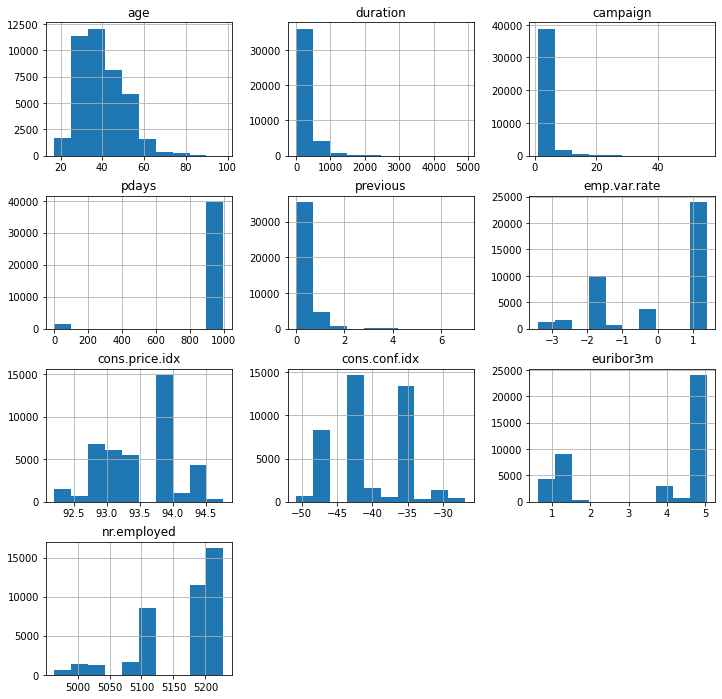

In [58]:
# 'education' analysis

# Replace unknown with mode:
condition  = (df_raw['education'] == 'unknown')
df_raw.loc[condition, 'education'] = df_raw['education'].mode()

nuniques = df_raw['education'].nunique()
counts = df_raw['education'].value_counts()
print(f'There are {nuniques} "educations" in {df_len} observations \n')
print(f'{counts}')

fig = plt.figure(figsize=(12,12))
ax = fig.gca()
df_raw.hist(ax=ax)

df_raw['education'].hist()

There are 2 "defaults" in 41176 observations 

no     32577
yes        3
Name: default, dtype: int64


<AxesSubplot:>

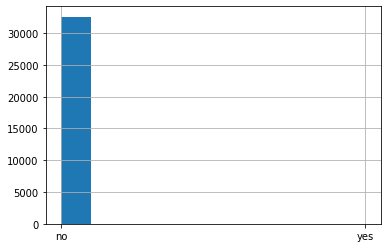

In [54]:
# 'default' analysis

# Replace unknown with mode:
condition  = (df_raw['default'] == 'unknown')
df_raw.loc[condition, 'default'] = df_raw['default'].mode()

nuniques = df_raw['default'].nunique()
counts = df_raw['default'].value_counts()
print(f'There are {nuniques} "defaults" in {df_len} observations \n')
print(f'{counts}')

df_raw['default'].hist()

Pendiente: pasar de categorical(yes, no) to boolean

There are 2 "housings" in 41176 observations 

yes    21571
no     18615
Name: housing, dtype: int64


<AxesSubplot:>

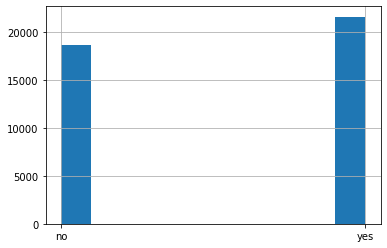

In [53]:
# 'housing' analysis

# Replace unknown with mode:
condition  = (df_raw['housing'] == 'unknown')
df_raw.loc[condition, 'housing'] = df_raw['housing'].mode()

nuniques = df_raw['housing'].nunique()
counts = df_raw['housing'].value_counts()
print(f'There are {nuniques} "housings" in {df_len} observations \n')
print(f'{counts}')

df_raw['housing'].hist()

There are 2 "loans" in 41176 observations 

no     33938
yes     6248
Name: loan, dtype: int64


<AxesSubplot:>

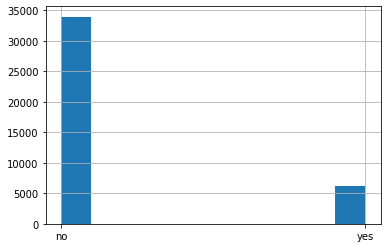

In [51]:
# 'loan' analysis

# Replace unknown with mode:
condition  = (df_raw['loan'] == 'unknown')
df_raw.loc[condition, 'loan'] = df_raw['loan'].mode()

nuniques = df_raw['loan'].nunique()
counts = df_raw['loan'].value_counts()
print(f'There are {nuniques} "loans" in {df_len} observations \n')
print(f'{counts}')

df_raw['loan'].hist()

There are 2 "contacts" in 41176 observations 

cellular     26135
telephone    15041
Name: contact, dtype: int64


<AxesSubplot:>

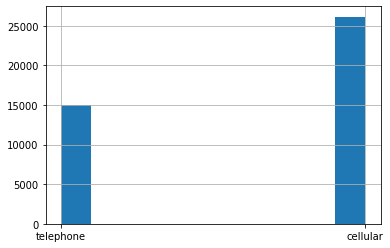

In [50]:
# 'contact' analysis

# Replace unknown with mode:
condition  = (df_raw['contact'] == 'unknown')
df_raw.loc[condition, 'contact'] = df_raw['contact'].mode()

nuniques = df_raw['contact'].nunique()
counts = df_raw['contact'].value_counts()
print(f'There are {nuniques} "contacts" in {df_len} observations \n')
print(f'{counts}')

df_raw['contact'].hist()

There are 10 "month" in 41176 observations 

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


<AxesSubplot:>

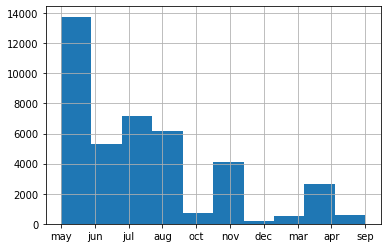

In [49]:
# 'month' analysis

nuniques = df_raw['month'].nunique()
counts = df_raw['month'].value_counts()
print(f'There are {nuniques} "month" in {df_len} observations \n')
print(f'{counts}')

df_raw['month'].hist()

In [ ]:
# 1.3 Transform if needed

In [ ]:
# 2.1 Split the dataset so to avoid bias

In [ ]:
# 2.2 Join the train sets to ease insights

In [ ]:
# 2.3 Get basic info

In [ ]:
# 2.4 Take a sample

In [ ]:
# 2.5 Describe the numerical and date variables

In [ ]:
# 2.6 Describe the categorical variables

In [ ]:
# 2.7 Perform univariate analysis - histograms

In [ ]:
# 2.8 Perform univariate analysis - boxplots

In [ ]:
# 2.9 Perform bivariate analysis - scatter matrix

In [ ]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial

In [ ]:
# 2.11 Perform multivariate analysis - VIF

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals

In [ ]:
# 3.1 Perform model fit - A

In [ ]:
# 3.2 Perform model fit - B

In [ ]:
# 3.3 Calculate metrics on model A

In [ ]:
# 3.4 Calculate metrics on model B

In [ ]:
# Step 4. Write up your conclusions